## Calculating Surface Roughness

This notebook demonstrates how to open a Nanosurf image file (*.nid) and calculate the surface roughness of the image.

In [1]:
# import required modules
from NSFopen.read import read

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the data
data_file = "sapphire.nid"
afm = read(data_file)
data = afm.data

Reading Header
Reading Data
Elapsed Time: 0.02 sec



In [3]:
# make a function to flatten the image
def flatten(data, order=1):
    data_out = np.copy(data)  # create copy of data
    for idx, line in enumerate(data_out):
        x = np.arange(len(line))
        p = np.polyfit(x, line, order)  # fit data to polynomial
        y = np.polyval(p, x)
        data_out[idx] = line - y  # subtract fit from data
    return data_out

In [4]:
Zaxis = data['Image']['Forward']['Z-Axis'] * 1e9  # height data scaled to nanometers

Zaxis_ = flatten(Zaxis, order=1)  # flatten data with 1st order polynomial (i.e. line)

In [5]:
# calculate the roughness as the Standard Deviation of the data array
rms = np.std(Zaxis_)
print(rms)

0.042123098751831574


Text(0.5, 1.0, 'Sample roughness (nm): 0.042')

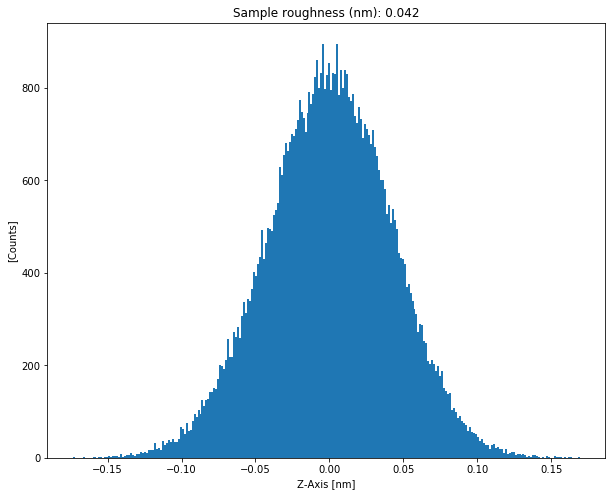

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(Zaxis_.flatten(), bins = 256);  # this flatten is the numpy function that converts a 2D array to 1D
plt.xlabel('Z-Axis [nm]');
plt.ylabel('[Counts]');
plt.title('Sample roughness (nm): %5.3f' % rms)